In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import os
# import shutil
# from sklearn.model_selection import train_test_split

# # Đường dẫn đến thư mục chứa dữ liệu gốc
# data_dir = '/content/drive/MyDrive/dataset/CarsDataset1/data'

# # Đường dẫn đến các thư mục lưu trữ train, val, test
train_dir = '/content/drive/MyDrive/dataset/CarsDataset1/train'
val_dir = '/content/drive/MyDrive/dataset/CarsDataset1/val'
test_dir = '/content/drive/MyDrive/dataset/CarsDataset1/test'

# # Tạo các thư mục train, val, test nếu chưa tồn tại
# os.makedirs(train_dir, exist_ok=True)
# os.makedirs(val_dir, exist_ok=True)
# os.makedirs(test_dir, exist_ok=True)

# # Tỷ lệ chia dữ liệu
# train_ratio = 0.7
# val_ratio = 0.15
# test_ratio = 0.15

# # Duyệt qua từng nhãn trong thư mục dữ liệu gốc
# for label in os.listdir(data_dir):
#     label_dir = os.path.join(data_dir, label)

#     # Lấy danh sách các tệp trong thư mục nhãn hiện tại
#     files = os.listdir(label_dir)
#     files = [os.path.join(label_dir, f) for f in files]  # Đường dẫn đầy đủ

#     # Chia dữ liệu thành train và temp (gồm val và test)
#     train_files, temp_files = train_test_split(files, test_size=(1 - train_ratio), random_state=42)

#     # Chia temp thành val và test
#     val_files, test_files = train_test_split(temp_files, test_size=test_ratio/(test_ratio + val_ratio), random_state=42)

#     # Tạo các thư mục cho nhãn trong các tập train, val, test
#     os.makedirs(os.path.join(train_dir, label), exist_ok=True)
#     os.makedirs(os.path.join(val_dir, label), exist_ok=True)
#     os.makedirs(os.path.join(test_dir, label), exist_ok=True)

#     # Copy các tệp vào thư mục tương ứng
#     for file in train_files:
#         shutil.copy(file, os.path.join(train_dir, label))

#     for file in val_files:
#         shutil.copy(file, os.path.join(val_dir, label))

#     for file in test_files:
#         shutil.copy(file, os.path.join(test_dir, label))

# print("Data has been successfully split into train, val, and test sets.")


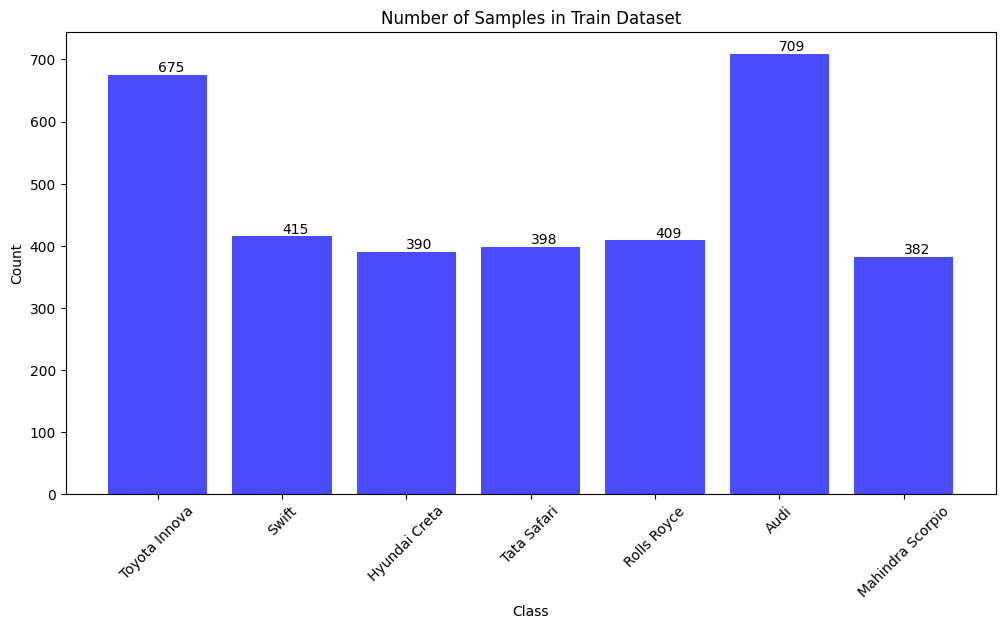

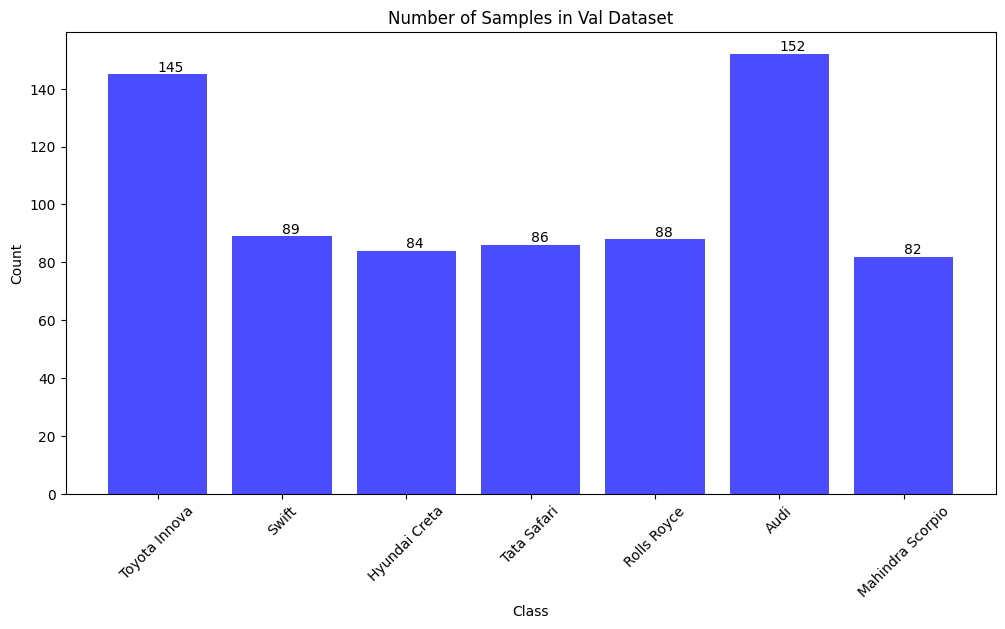

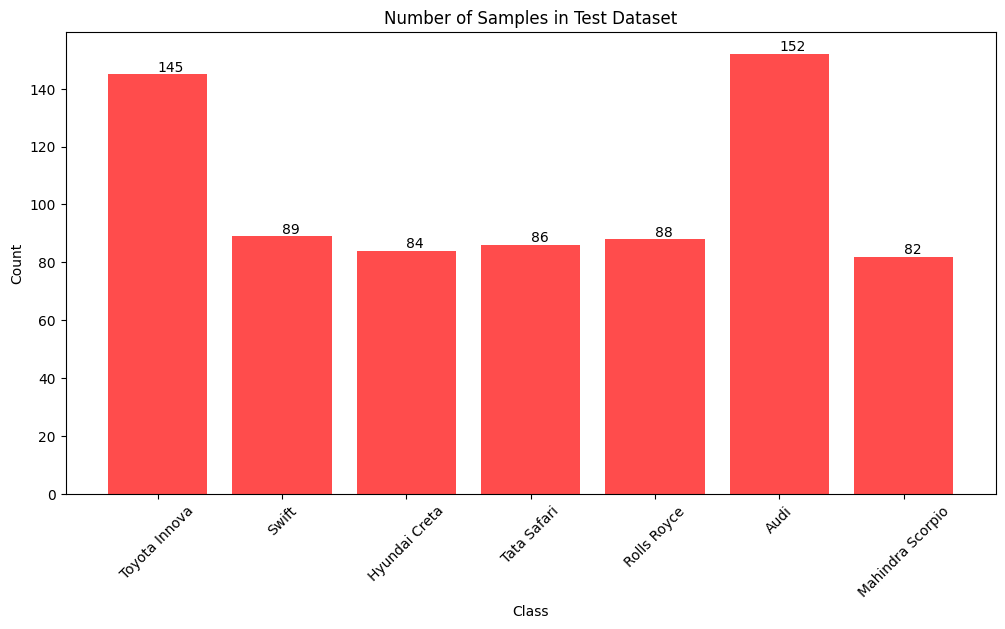

In [3]:
import os
import matplotlib.pyplot as plt
import pandas as pd

# Đường dẫn tới dataset
#train_dir = "/content/drive/MyDrive/CarsDataset/train"
#test_dir = "/content/drive/MyDrive/CarsDataset/test"

# Đường dẫn tới dataset
# train_dir = "/content/drive/MyDrive/dataset/CarsDataset1/train"
# test_dir = "/content/drive/MyDrive/dataset/CarsDataset1/test"
# Hàm để đếm số lượng file trong mỗi thư mục con
# def count_files_in_directory(directory):
#     count_dict = {}
#     for subdir in os.listdir(directory):
#         subdir_path = os.path.join(directory, subdir)
#         if os.path.isdir(subdir_path):
#             count_dict[subdir] = len(os.listdir(subdir_path))
#     return count_dict

def count_files_in_directory(directory):
    count_dict = {}
    for subdir in os.listdir(directory):

        subdir_path = os.path.join(directory, subdir)
        if os.path.isdir(subdir_path):
            # Đếm các file trong thư mục hiện tại (không bao gồm thư mục con)
            count = len([f for f in os.listdir(subdir_path) if os.path.isfile(os.path.join(subdir_path, f))])
            count_dict[subdir] = count


    return count_dict

# Đếm số lượng file trong thư mục train và test
train_counts = count_files_in_directory(train_dir)
val_counts = count_files_in_directory(val_dir)
test_counts = count_files_in_directory(test_dir)

# Tạo DataFrame từ dữ liệu đã đếm
train_df = pd.DataFrame(list(train_counts.items()), columns=['Class', 'Count'])
val_df = pd.DataFrame(list(val_counts.items()), columns=['Class', 'Count'])
test_df = pd.DataFrame(list(test_counts.items()), columns=['Class', 'Count'])

# Vẽ biểu đồ số lượng mẫu trong tập train
plt.figure(figsize=(12, 6))
bars = plt.bar(train_df['Class'], train_df['Count'], color='b', alpha=0.7)
plt.title('Number of Samples in Train Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
# Thêm số lượng mẫu trên đỉnh mỗi cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom') # va: vertical alignment
plt.show()

# Vẽ biểu đồ số lượng mẫu trong tập val
plt.figure(figsize=(12, 6))
bars = plt.bar(val_df['Class'], val_df['Count'], color='b', alpha=0.7)
plt.title('Number of Samples in Val Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
# Thêm số lượng mẫu trên đỉnh mỗi cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom') # va: vertical alignment
plt.show()

# Vẽ biểu đồ số lượng mẫu trong tập test
plt.figure(figsize=(12, 6))
bars = plt.bar(test_df['Class'], test_df['Count'], color='r', alpha=0.7)
plt.title('Number of Samples in Test Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
# Thêm số lượng mẫu trên đỉnh mỗi cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom') # va: vertical alignment
plt.show()


In [4]:
# from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten, Conv2D #action detectionimport tensorflow
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import SparseCategoricalCrossentropy

from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

from tensorflow import keras
from tensorflow.keras import layers, models, Input, Model
import tensorflow as tf

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#import databricks.koalas as ks
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
IMAGE_SIZE = 224

train_datagen = ImageDataGenerator(
        rescale=1./255,
        horizontal_flip = True,
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        fill_mode='nearest',
)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="categorical",
        color_mode= 'rgb',
        shuffle=True,
        batch_size=16
)

Found 3378 images belonging to 7 classes.


In [6]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 10))
# for image_batch, label_batch in train_generator:
#   for i in range(9):
#       ax = plt.subplot(3,3,i+1)
#       plt.xticks([])
#       plt.yticks([])
#       plt.grid(False)
#       plt.imshow(image_batch[i], cmap=plt.cm.binary)
#       plt.title(label_batch[i])
#       plt.axis("off")
#   plt.show()
#   break

In [7]:
num_samples = train_generator.samples
print(f'Number of samples in train_generator: {num_samples}')


Number of samples in train_generator: 3378


In [8]:
datagen = ImageDataGenerator(
        rescale=1./255,
        horizontal_flip = False)


val_generator = datagen.flow_from_directory(
        val_dir,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="categorical",
        color_mode= 'rgb',
        shuffle = False,
)


test_generator = datagen.flow_from_directory(
        test_dir,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="categorical",
        color_mode= 'rgb',
        shuffle = False,
)

Found 726 images belonging to 7 classes.
Found 726 images belonging to 7 classes.


In [9]:


def create_cnn(input_shape, num_classes):
    model = Sequential()

    model.add(Convolution2D(32, (5, 5), input_shape=input_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Convolution2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.40))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=num_classes, activation='softmax'))

    return model


IMAGE_SIZE = 224
num_classes = 7
input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)

model = create_cnn(input_shape, num_classes)
# Compile model
epochs = 100


model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])
print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 220, 220, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 106, 106, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 51, 51, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 23, 23, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 11, 11, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,392,135 (16.75 MB)

 Trainable params: 4,392,135 (16.75 MB)

 Non-trainable params: 0 (0.00 B)

None


In [10]:
callbacks = keras.callbacks.EarlyStopping(monitor="val_accuracy",patience= 10,verbose=1,min_delta = 0.01,restore_best_weights=True)
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    # callbacks=[callbacks]
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


212/212 ━━━━━━━━━━━━━━━━━━━━ 1344s 6s/step - accuracy: 0.2169 - loss: 1.9581 - val_accuracy: 0.2893 - val_loss: 1.8273
Epoch 2/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 58s 264ms/step - accuracy: 0.2513 - loss: 1.8630 - val_accuracy: 0.2645 - val_loss: 1.8545
Epoch 3/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 57s 263ms/step - accuracy: 0.3030 - loss: 1.8173 - val_accuracy: 0.3099 - val_loss: 1.8262
Epoch 4/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 85s 274ms/step - accuracy: 0.3151 - loss: 1.7765 - val_accuracy: 0.3705 - val_loss: 1.6579
Epoch 5/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 58s 265ms/step - accuracy: 0.3696 - loss: 1.7062 - val_accuracy: 0.2879 - val_loss: 1.9885
Epoch 6/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 61s 282ms/step - accuracy: 0.3892 - loss: 1.6161 - val_accuracy: 0.3499 - val_loss: 1.8000
Epoch 7/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 57s 259ms/step - accuracy: 0.4258 - loss: 1.5476 - val_accuracy: 0.4339 - val_loss: 1.4874
Epoch 8/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 83s 269ms/step - accuracy: 0.4496 - loss: 1.4703

In [11]:
scores = model.evaluate(test_generator)
print(f"Test Accuracy: {scores[1]*100}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 216s 10s/step - accuracy: 0.8480 - loss: 0.8232
Test Accuracy: 84.02203917503357


In [12]:
model.save('/content/drive/MyDrive/dataset/CarsDataset1/my_model2.h5')

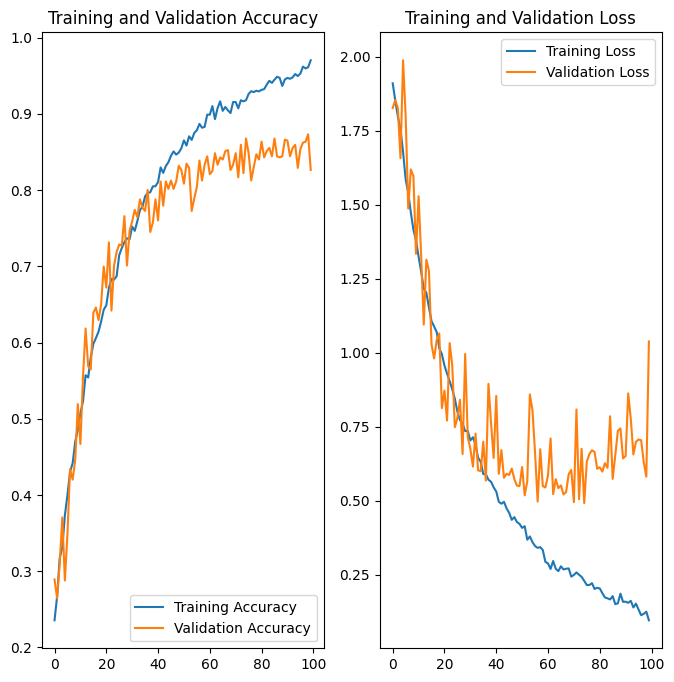

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

import matplotlib.pyplot as plt
EPOCHS = 100

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
import tensorflow as tf
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:
# model.save('/content/drive/MyDrive/model/cnn-parallel.h5')

In [ ]:
# from tensorflow.keras.models import load_model

# # Load the model
# loaded_model1 = load_model('/content/drive/MyDrive/model/cnn-parallel.h5')

23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 250ms/step
Number of true labels: 726
Number of predicted labels: 726


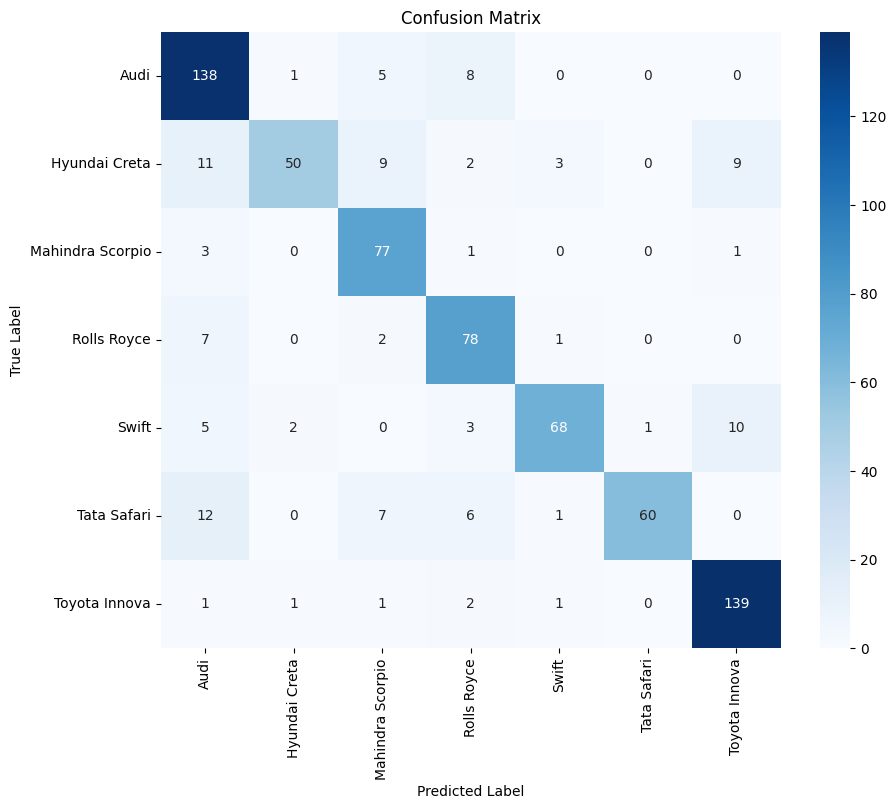

In [16]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử bạn đã có mô hình CNN đã huấn luyện, test_generator và class_names
# model = ... (mô hình CNN đã huấn luyện)
# test_generator = ... (ImageDataGenerator cho dữ liệu kiểm tra)
class_names = ["Audi","Hyundai Creta","Mahindra Scorpio", "Rolls Royce","Swift","Tata Safari",  "Toyota Innova"]

# Lấy nhãn thực tế từ test_generator
y_true = test_generator.classes

# Dự đoán nhãn từ mô hình
test_steps = (test_generator.samples // test_generator.batch_size) + 1
y_pred = model.predict(test_generator, steps=test_steps, verbose=1)

# Kiểm tra số lượng mẫu dự đoán và thực tế
print(f"Number of true labels: {len(y_true)}")
print(f"Number of predicted labels: {len(y_pred)}")

# Lấy số lượng nhãn dự đoán chính xác
y_pred_classes = np.argmax(y_pred, axis=1)[:len(y_true)]

# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_true, y_pred_classes)

# Hiển thị ma trận nhầm lẫn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


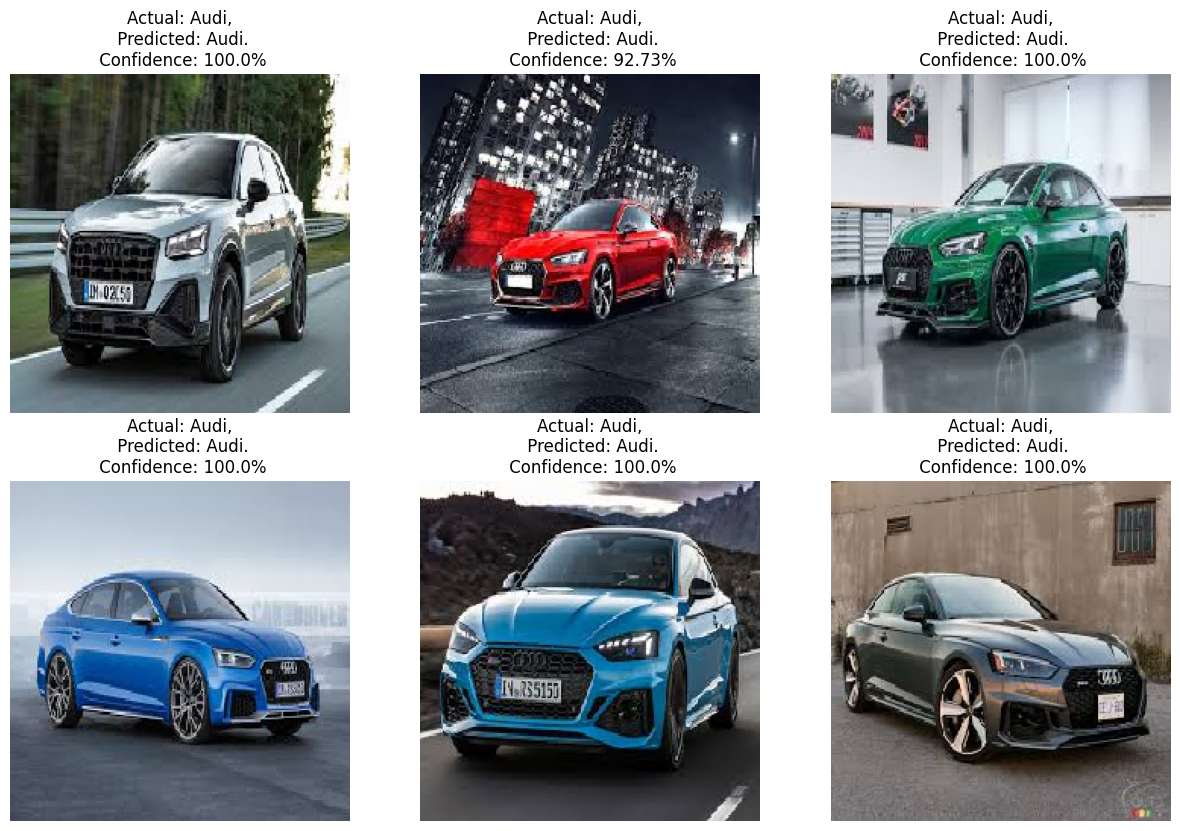

In [17]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[np.argmax(labels)]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break